In [1]:
#! Unfortunately, due to time budget cuts, this notebook is on ice
# What do I still need to do?
# I wrote some demo.py code so that I could pass in manual values for the minimum and maximum for each color plot.
# I also wrote some code which would automatically force all plots (in a single grid) to stick to the same global
    # minimum and maximum values, to make the plots easier to compare.
# None of these functionalities has been tested.

%matplotlib inline
import skyflux as sf

//anaconda3/envs/hera2/lib/python3.8/site-packages/skyflux/catalog.py:60: UserWarning: Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
  w.warn(warning)
//anaconda3/envs/hera2/lib/python3.8/site-packages/skyflux/catalog.py:60: UserWarning: Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
  w.warn(warning)
//anaconda3/envs/hera2/lib/python3.8/site-packages/skyflux/catalog.py:60: UserWarning: Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
  w.warn(warning)
//anaconda3/envs/hera2/lib/python3.8/site-packages/skyflux/catalog.py:60: UserWarning: Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
  w.warn(warning)
//anaconda3/envs/hera2/lib/python3.8/site-packages/skyflux/catalog.py:68: UserWarning: Missing spectral index for: GLEAM J202818-254302
  w.warn(warning)
//anaconda3/envs/hera2/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. U

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

import numpy as np
import healpy as hp

In [3]:
# Normally I would run this at nside=128, but I want to keep the notebok relatively small,
# so nside is 64 here
J_sky = sf.stokes.create_J_sky(64, 151e6)
print(J_sky.shape)

(49152, 2, 2)


//anaconda3/envs/hera2/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
//anaconda3/envs/hera2/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
//anaconda3/envs/hera2/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify

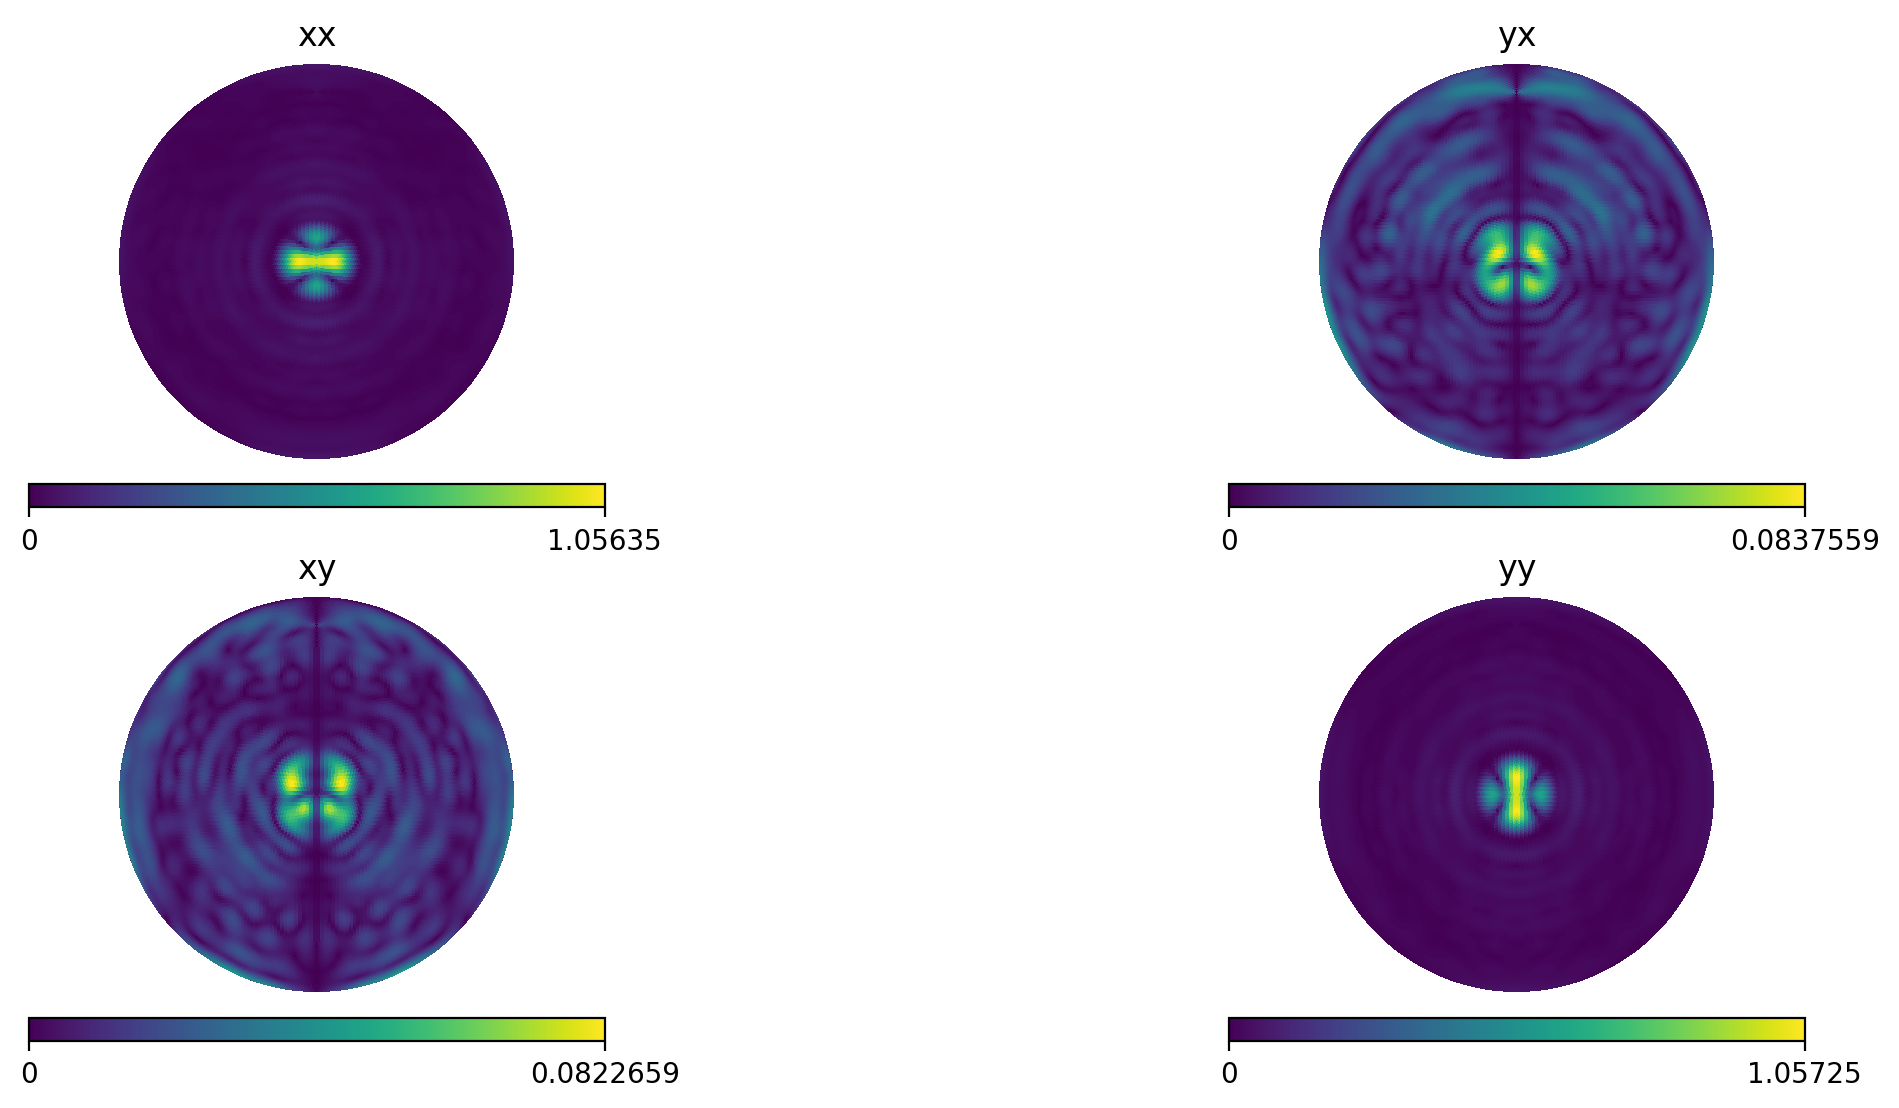

In [4]:
sf.demo.project_J(J_sky, np.abs, rep=hp.orthview)

In [5]:
A_sky = np.array([sf.stokes.create_A(J=Ji) for Ji in J_sky])
print(A_sky.shape)
# want real, im, abs, log(abs)

(49152, 4, 4)


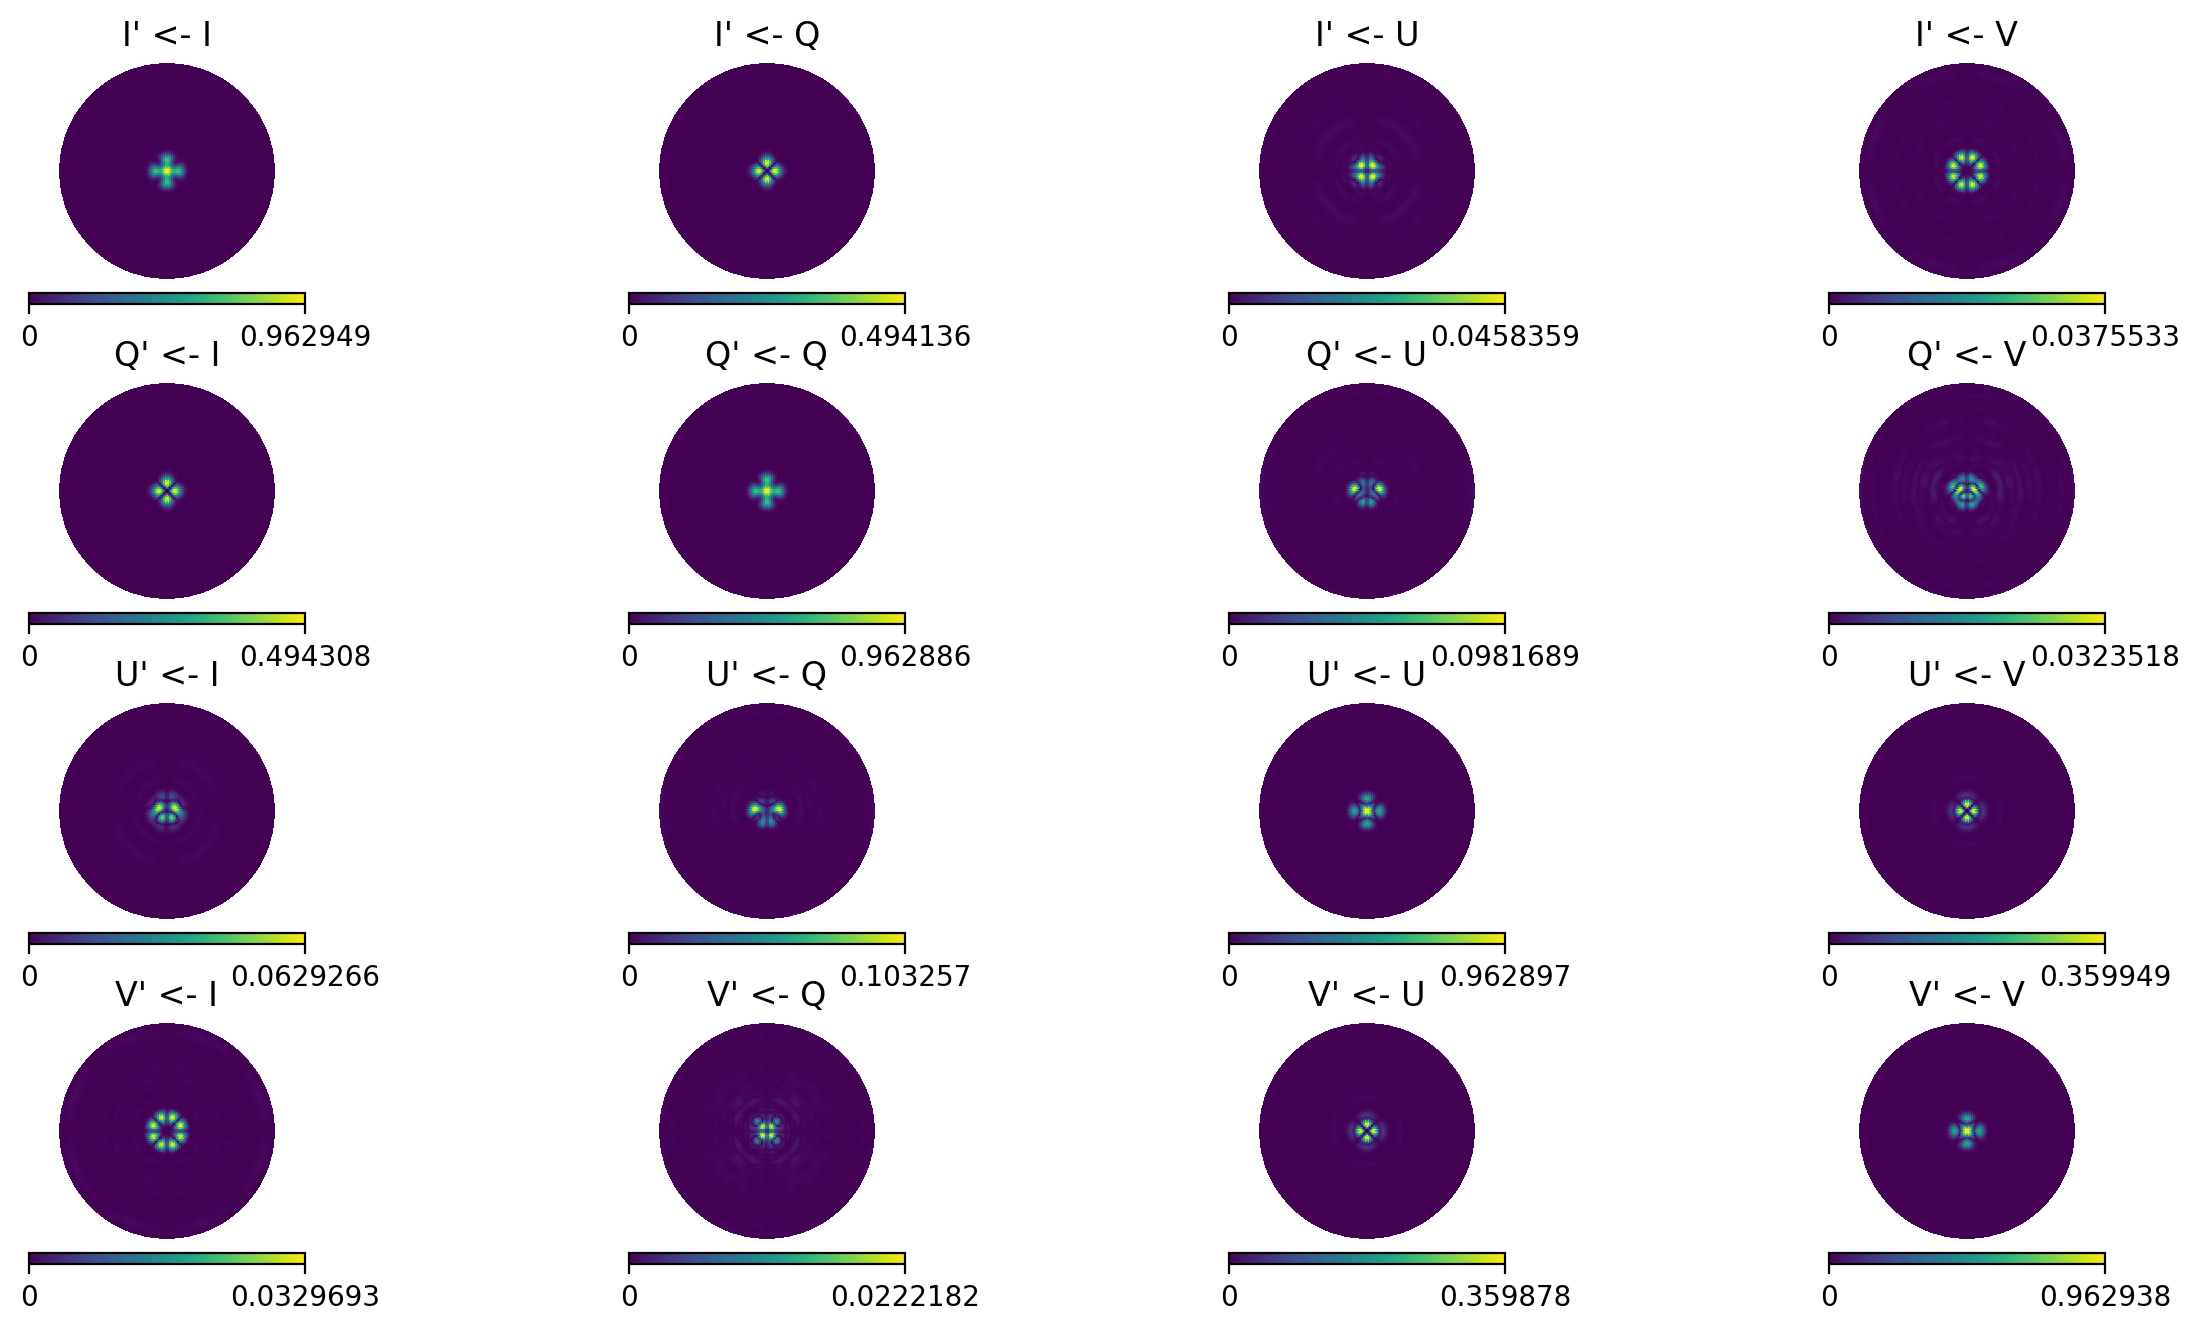

In [6]:
sf.demo.project_A(A_sky, np.abs)

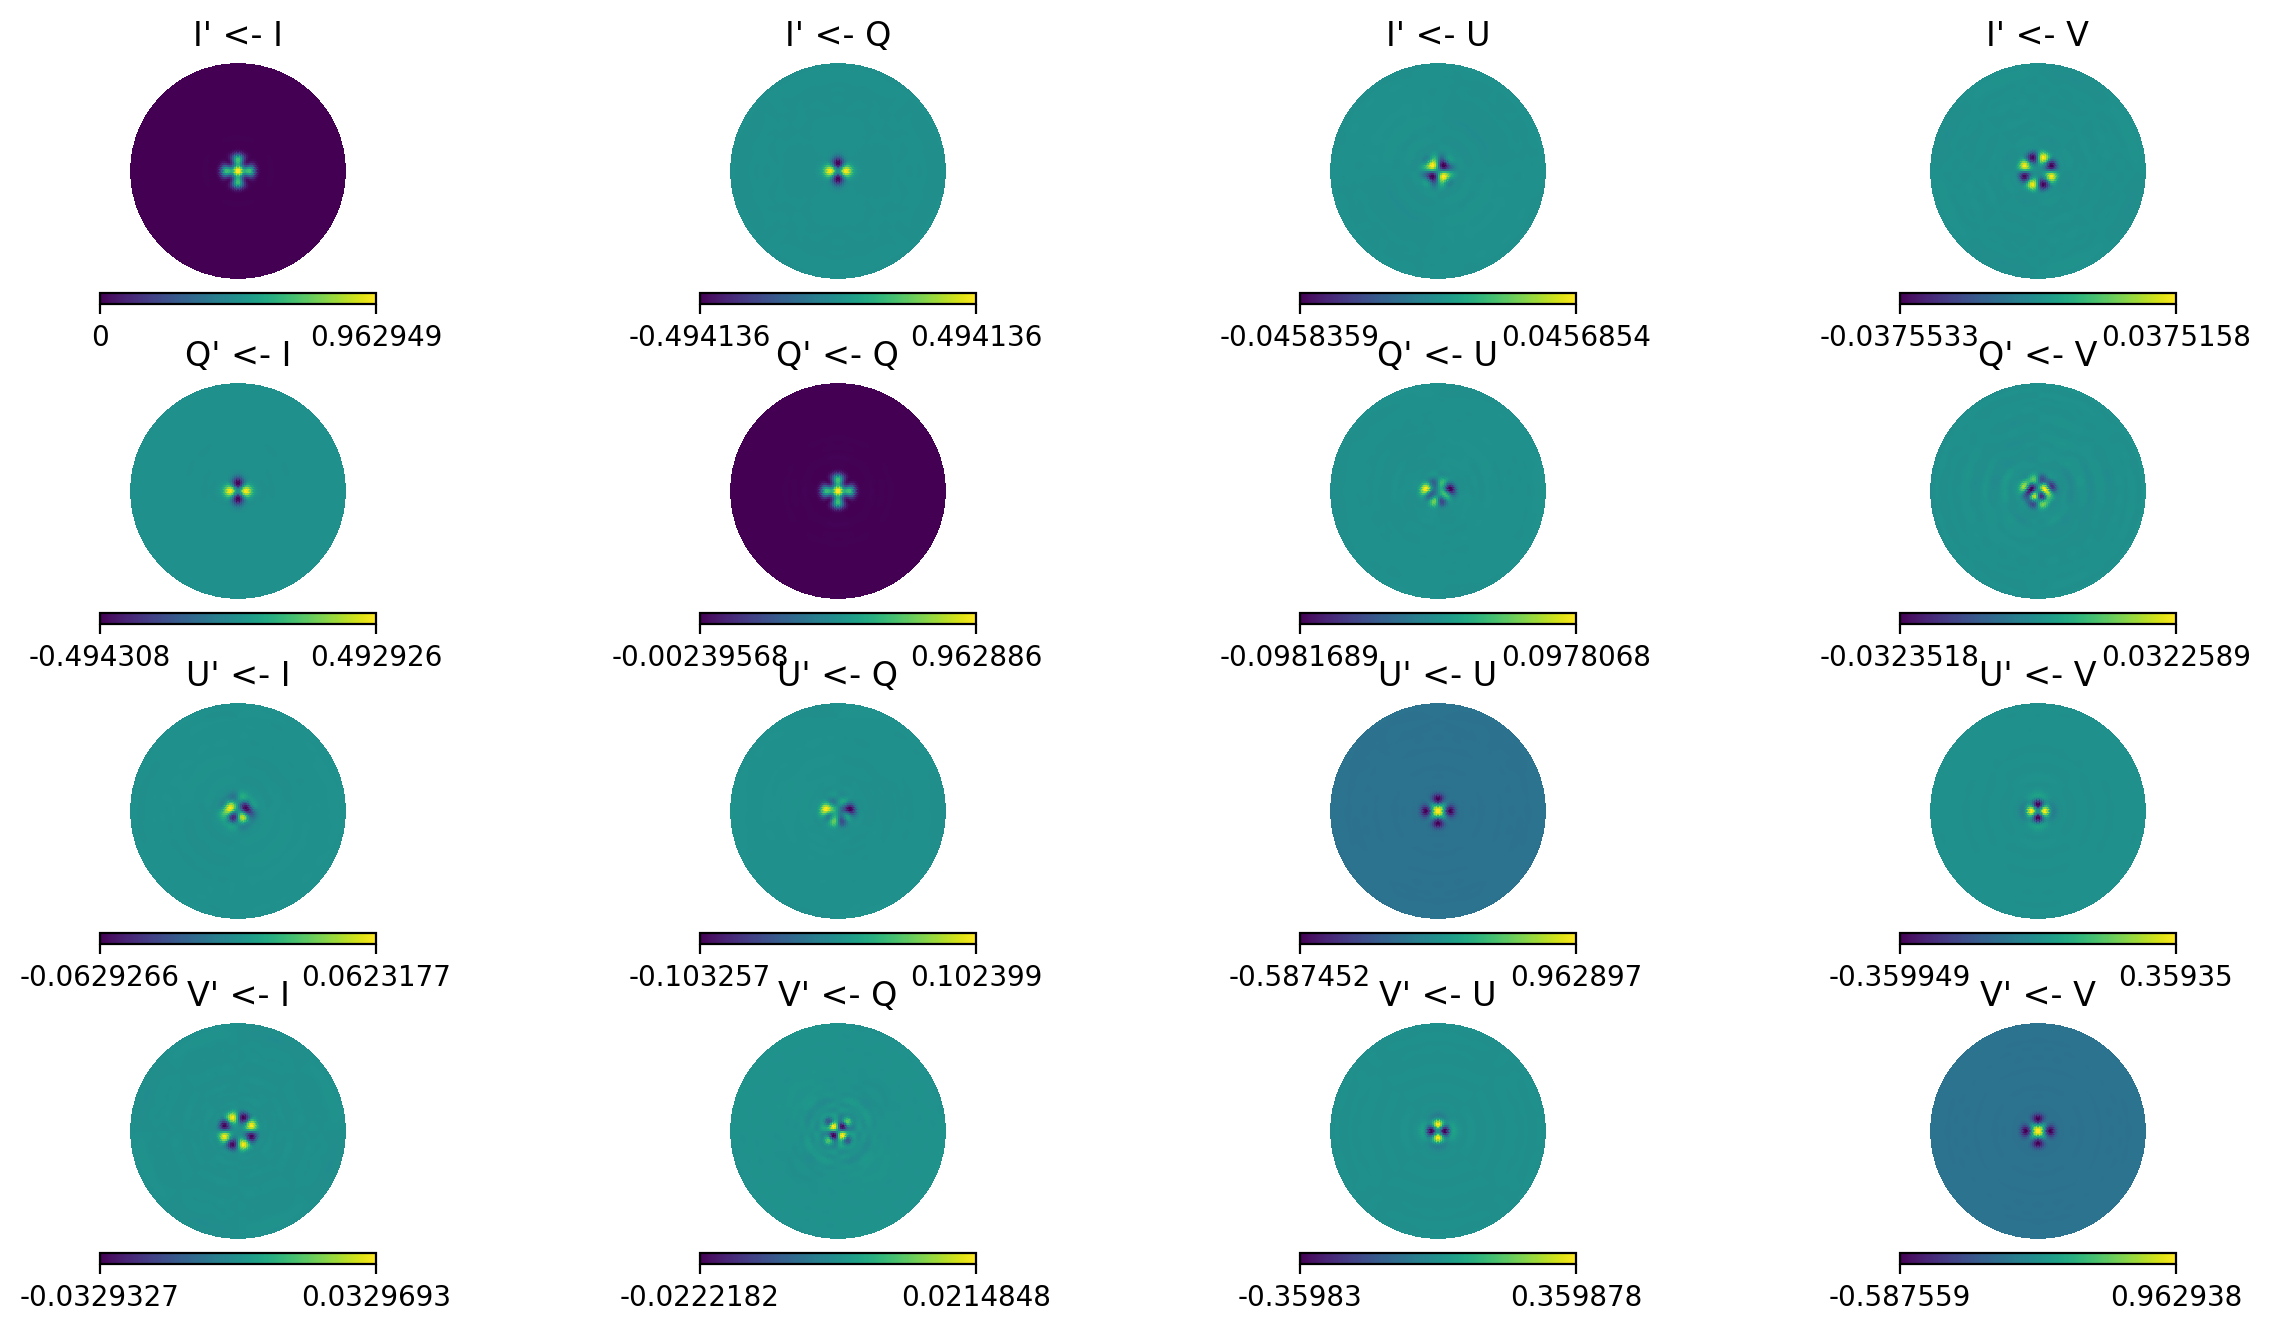

In [7]:
# keep in mind that the A matrix is pure real:
# sf.demo.project_A(A_sky, np.imag) will yield blank graphs
sf.demo.project_A(A_sky, np.real)

<ipython-input-8-a6396657c888>:1: RuntimeWarning: divide by zero encountered in log
  log_abs = lambda x: np.log(np.abs(x))


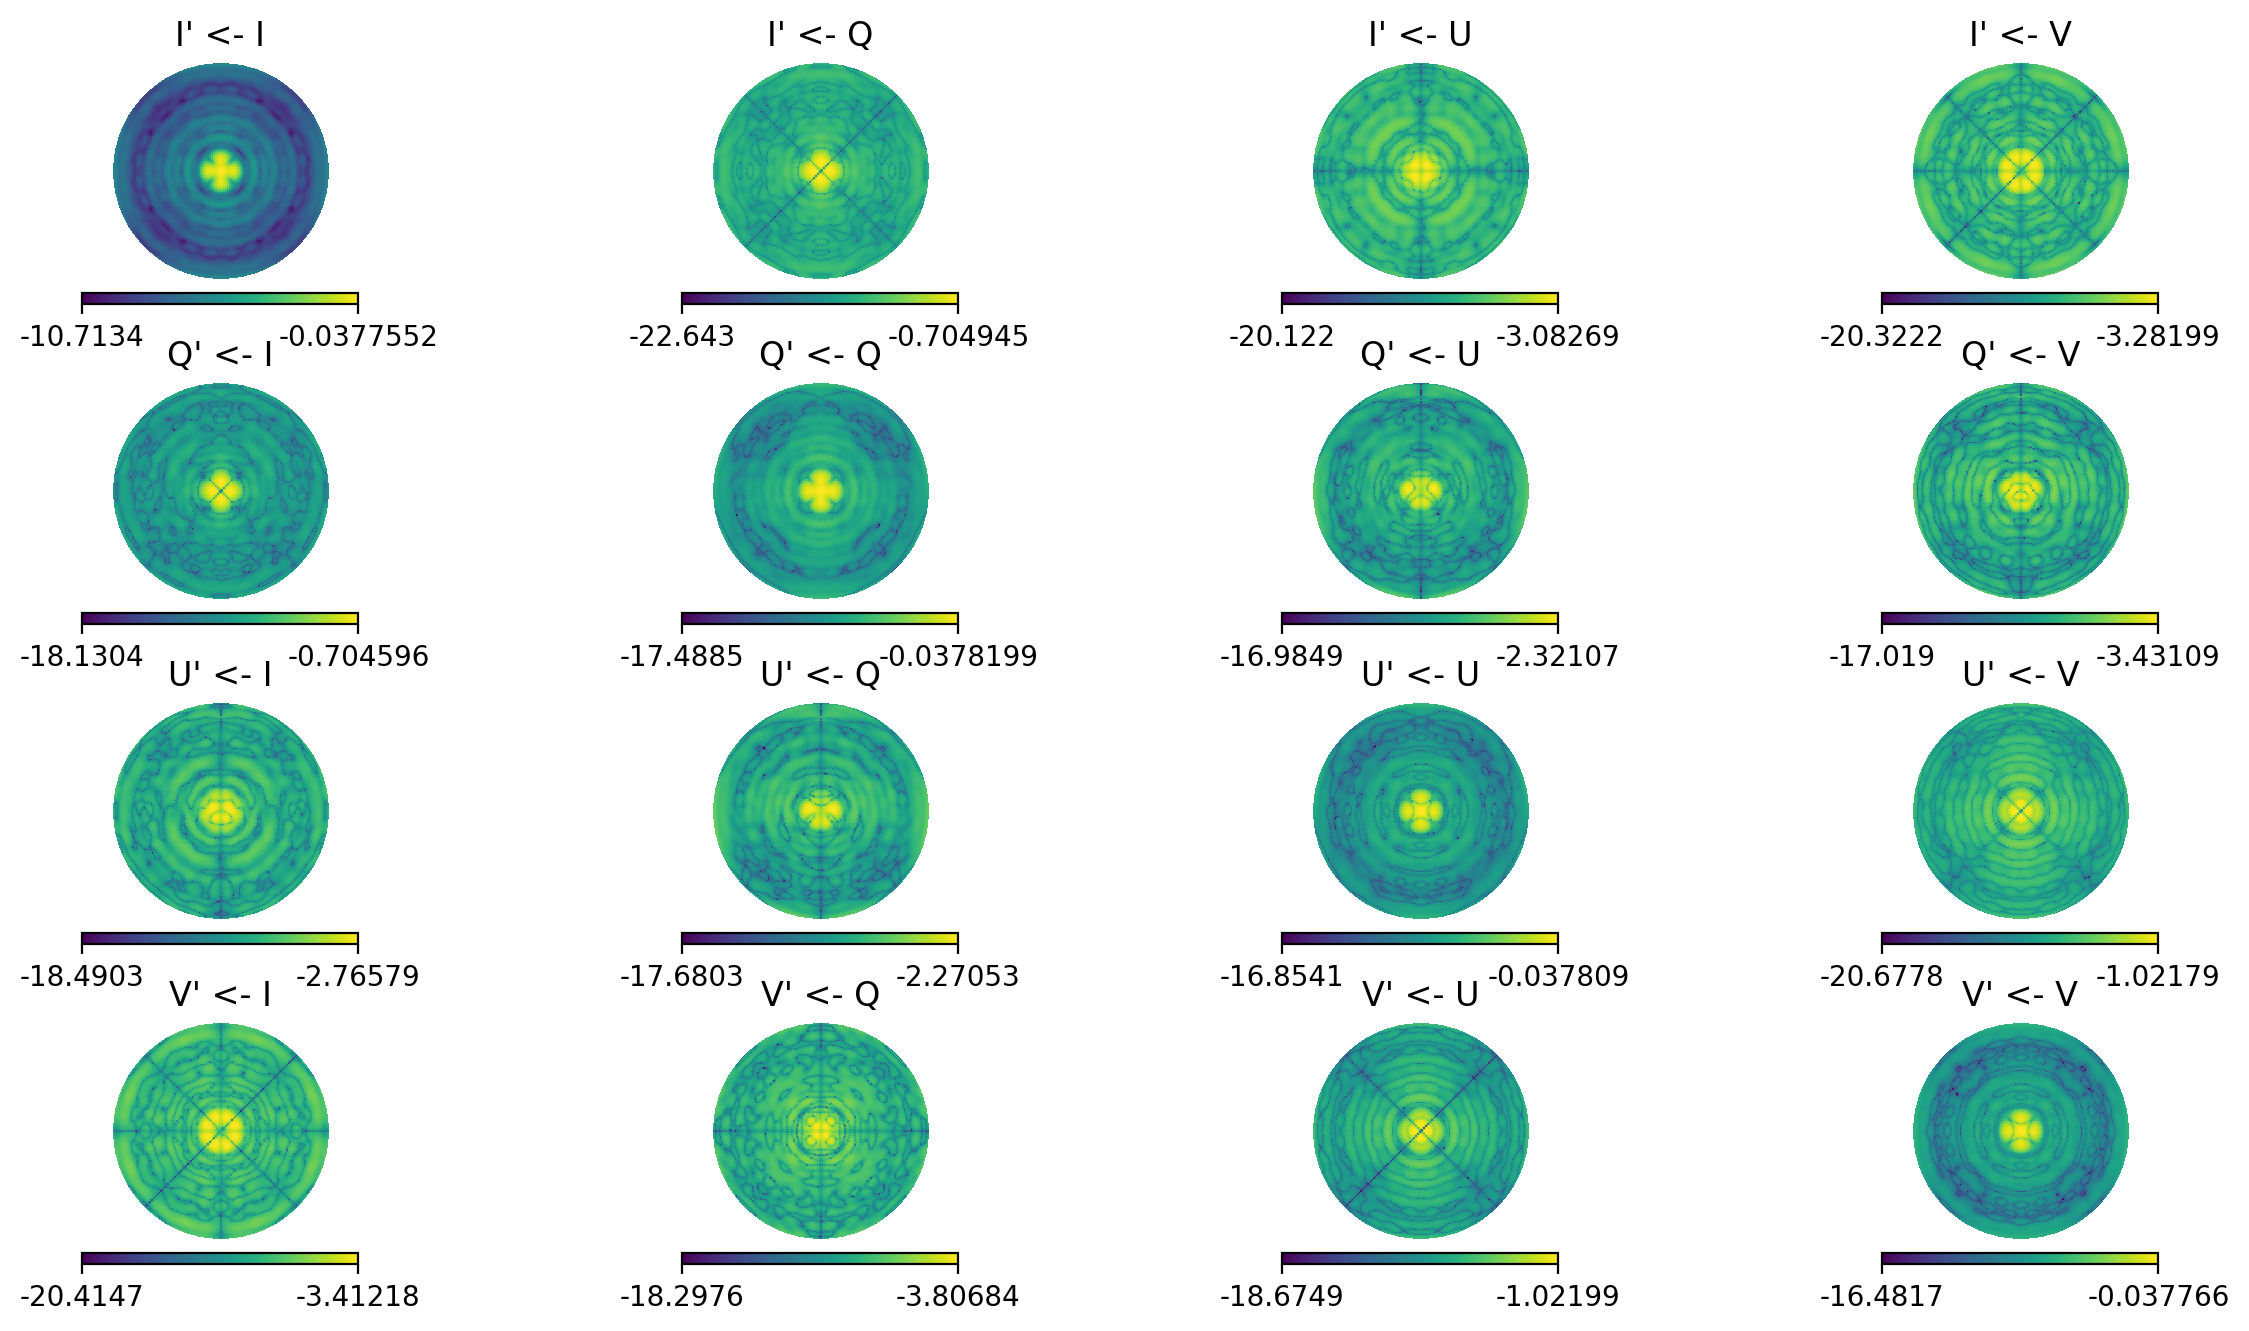

In [8]:
log_abs = lambda x: np.log(np.abs(x))
sf.demo.project_A(A_sky, log_abs)